# Sentiment Analysis

In [1]:
!pip install textblob   

# Necessary Imports

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Download stopwords from NLTK 

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Project dataset path are set here

In [43]:
proj_path = '/content/drive/MyDrive/colab_data/NLP PROJ'
dataset_file = proj_path + '/Comments.csv'

# Load the dataset and take a peek

In [59]:
df = pd.read_csv(dataset_file, encoding='cp1252')

In [60]:
df.columns = ["Text"]   #assigning label to text field

In [61]:
df.head()

,Text
0,Gluten free options
1,"Change the menu, it's becoming tired."
2,Additional dishes using same ingredients on cu...
3,Very limited
4,"Chicken alfredo Pasta dish, fried shrimp, , Ch..."


# Check and Remove Null values

In [62]:
df.isnull().sum()

Text    1
dtype: int64

# Remove Null values

In [63]:
df.dropna(inplace=True)

# Preprocessing on the Data

In [64]:
stopwords = [' of ', ' more ', ' or ', ' and ', ' was ', ' the ', ' to ', ' is ', ' a ', ' i ']
def preprocessing(text):
  text = text.lower()
  text = "".join(word for word in text if word not in stopwords)
  return text

In [65]:
df["cleaned_text"] = df.loc[:,'Text'].apply(lambda x : preprocessing(x))

# Get sentiment of text using TextBlob

In [66]:
def get_sentiment(x,key):
  if key=='Polarity':
    return TextBlob(x).sentiment.polarity
  
df['Polarity']=df['cleaned_text'].apply(lambda x:get_sentiment(x,'Polarity'))

In [86]:
df.head()#Take a peek on data

,Text,cleaned_text,Polarity,Label
0,Gluten free options,gluten free options,0.400000,Positive
1,"Change the menu, it's becoming tired.","change the menu, it's becoming tired.",0.025000,Positive
2,Additional dishes using same ingredients on cu...,additional dishes using same ingredients on cu...,0.116667,Positive
3,Very limited,very limited,-0.092857,Negative
4,"Chicken alfredo Pasta dish, fried shrimp, , Ch...","chicken alfredo pasta dish, fried shrimp, , ch...",-0.408333,Negative


###Create a label column with label value of dataset

In [70]:
for i in df['Polarity']:
  if i>0:
    df['Label']='Positive'
  if i<0:
    df['Label']=='Negative'
  else:
    df['Label']=='Neural'

# This function gets the label value corresponding to the given Polarity integer

In [87]:
def get_label(x):
  if x>0:
    return 'Positive'
  if x<0:
    return 'Negative'
  else:
    return 'Neural'

df['Label']=df['Polarity'].apply(get_label)

In [88]:
df.head()

,Text,cleaned_text,Polarity,Label
0,Gluten free options,gluten free options,0.400000,Positive
1,"Change the menu, it's becoming tired.","change the menu, it's becoming tired.",0.025000,Positive
2,Additional dishes using same ingredients on cu...,additional dishes using same ingredients on cu...,0.116667,Positive
3,Very limited,very limited,-0.092857,Negative
4,"Chicken alfredo Pasta dish, fried shrimp, , Ch...","chicken alfredo pasta dish, fried shrimp, , ch...",-0.408333,Negative


# Shows the count of possible values i.e. Positive, Neutral and Negitive

In [73]:
df['Label'].value_counts()

Positive    532
Neural      237
Negative    162
Name: Label, dtype: int64

###Plot the graph of counted values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


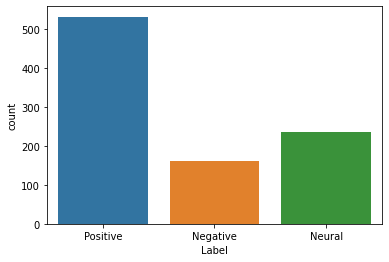

In [74]:
sns.countplot(df['Label'])

# Create a fresh copy of df and save only two columns of cleaned_text and Label

In [76]:
new_df = df.copy()
new_df = df[['cleaned_text','Label']]

In [79]:
new_df.head()

,cleaned_text,Label
0,gluten free options,Positive
1,"change the menu, it's becoming tired.",Positive
2,additional dishes using same ingredients on cu...,Positive
3,very limited,Negative
4,"chicken alfredo pasta dish, fried shrimp, , ch...",Negative


# Here we use label encoder to encode each value in label column as 0, 1, and 2 for Negitive, Neutral, and Positive

In [95]:
new_df['Label']=LabelEncoder().fit_transform(new_df['Label'])
vectorizer=CountVectorizer()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
new_df.head()

,cleaned_text,Label
0,gluten free options,2
1,"change the menu, it's becoming tired.",2
2,additional dishes using same ingredients on cu...,2
3,very limited,0
4,"chicken alfredo pasta dish, fried shrimp, , ch...",0


# Count Vectorizer is used to vectorize

In [99]:
X=vectorizer.fit_transform(new_df['cleaned_text'])

In [100]:
#Shape after vetorization
X.shape

(931, 2146)

In [101]:
X=X.toarray()

In [102]:
x_train,x_test,y_train,y_test=train_test_split(X,new_df['Label'].values,test_size=0.2)

# SVC classifer model to classify the sentiment of the text. Its precision and accuracy is show here.

In [104]:
Model=SVC()
Model.fit(x_train,y_train)
print(f'Training Accuracy : {Model.score(x_train,y_train)} and Testing Accuracy : {Model.score(x_test,y_test)}')
print(classification_report(y_test,Model.predict(x_test)))

Training Accuracy : 0.9112903225806451 and Testing Accuracy : 0.7967914438502673
              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.70      0.86      0.78        44
           2       0.82      0.90      0.86       108

    accuracy                           0.80       187
   macro avg       0.82      0.72      0.73       187
weighted avg       0.82      0.80      0.78       187

